<a href="https://colab.research.google.com/github/Marina-Zakaria/Data-Mining-ClusteringAlgorithms/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data

In [0]:
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df=pd.read_csv(url)

In [42]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#Part One : Data Preprocessing

1) Drop the nominal attributes; Region and Channel

In [143]:
df=df.drop(columns=['Channel','Region'])
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


2)Apply non-linear scaling (e.g. logarithmic) to fix the normality of the data. This is used particularly for financial data and high variance data

In [44]:
df.var()

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicassen          7.952997e+06
dtype: float64

In [0]:
import numpy as np
df=np.log(df)

In [46]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [47]:
df.var()

Fresh               2.190611
Milk                1.169351
Grocery             1.245839
Frozen              1.650043
Detergents_Paper    2.961910
Delicassen          1.718279
dtype: float64

3)Check for Outliers and remove them if any.

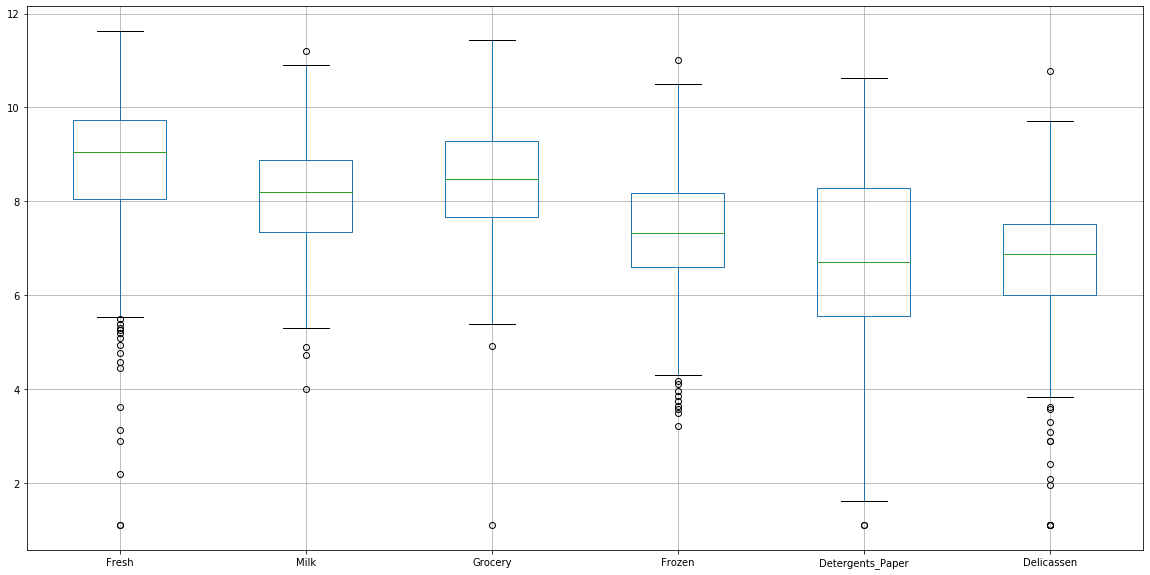

In [49]:
df.boxplot(column=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'],figsize=(20,10))

In [145]:
x=[]
for col in df.columns:
  print(col)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
  print(filter.count())
  i=0
  for i in range (filter.count()-1):
      #print( filter[i])
      if(i not in x and filter[i]==False):
        print(i)
        x.append(i)
        df = df.drop([i], axis=0)

Fresh
440
65
66
81
95
96
128
171
193
218
304
305
338
353
355
357
412
Milk
424
86
98
154
356
Grocery
420
75
Frozen
419
38
57
145
175
183
184
264
325
Detergents_Paper
411
161
204
Delicassen
409
109
137
142
187
203
233
285
289
343


[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 38, 57, 145, 175, 183, 184, 264, 325, 161, 204, 109, 137, 142, 187, 203, 233, 285, 289, 343]


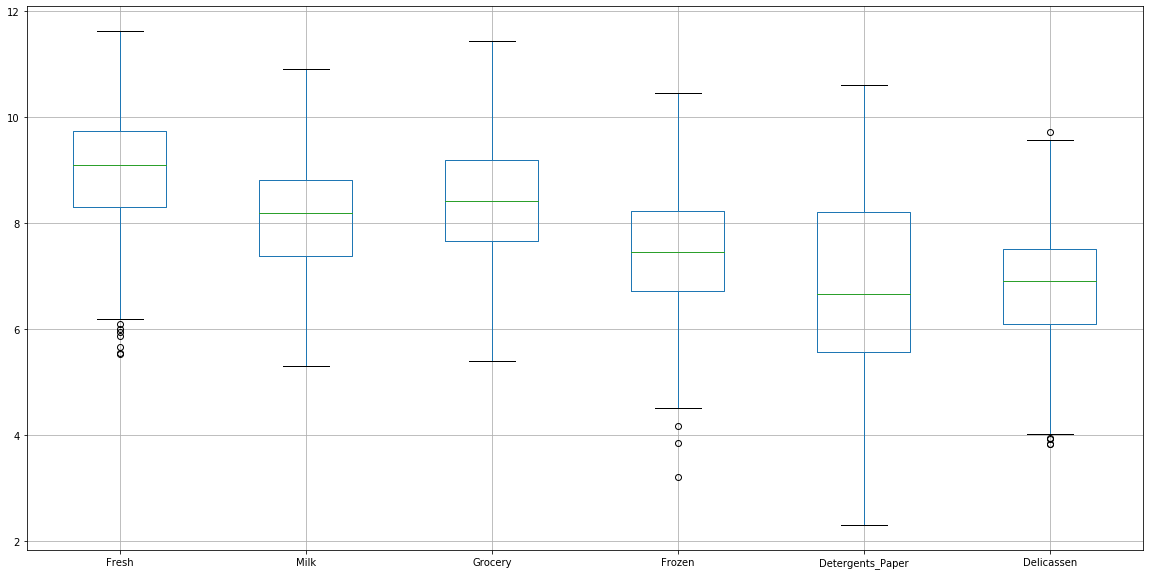

In [116]:
print(x)
df.boxplot(column=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'],figsize=(20,10))

4)Apply PCA analysis on the normalized data set

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
df = pd.DataFrame(data = principalComponents
             )

In [126]:
df
#df.corr().style.background_gradient(cmap='coolwarm')

,0,1
0,1.772732,-0.710158
1,1.869698,0.493974
2,1.983801,1.284359
3,-1.015358,1.404212
4,0.975560,2.089104
...,...,...
395,-0.376878,2.900274
396,-3.022287,1.845727
397,3.835973,0.125286
398,-1.635558,0.184854


#Part Two : Clustering

1)K means

For n_clusters = 2  silhouette score is  0.46855353000861055
For n_clusters = 3  silhouette score is  0.37374022760816544
For n_clusters = 4  silhouette score is  0.33621723687560967
For n_clusters = 5  silhouette score is  0.347249623774744
For n_clusters = 6  silhouette score is  0.3478353544367121
For n_clusters = 7  silhouette score is  0.3528547177239688
For n_clusters = 8  silhouette score is  0.34036866966333684
For n_clusters = 9  silhouette score is  0.35722853145257544
For n_clusters = 10  silhouette score is  0.3628752317274146


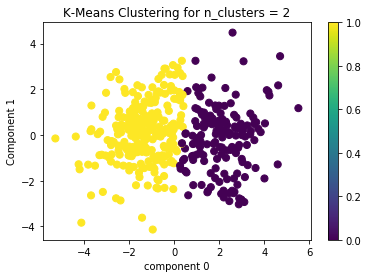

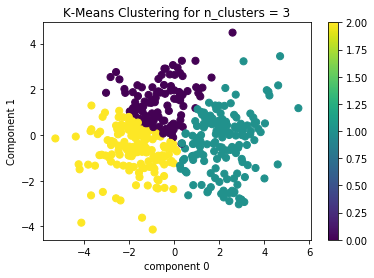

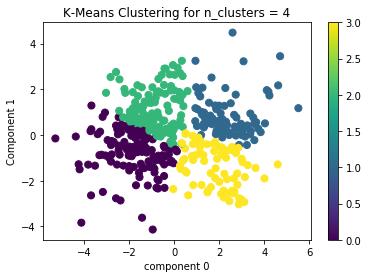

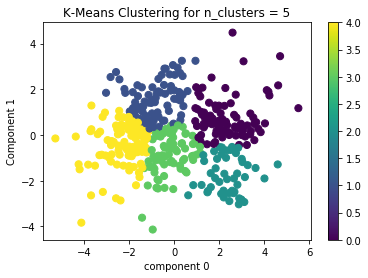

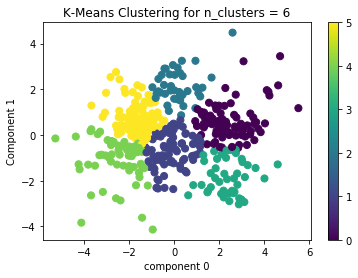

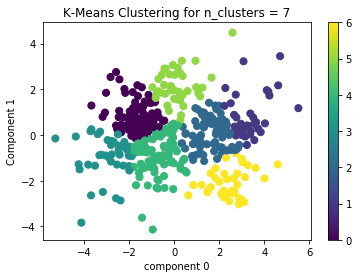

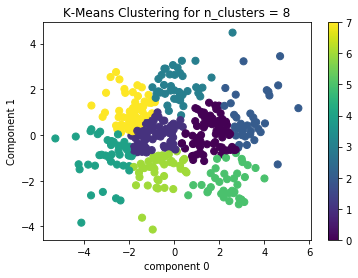

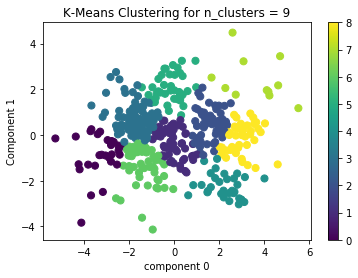

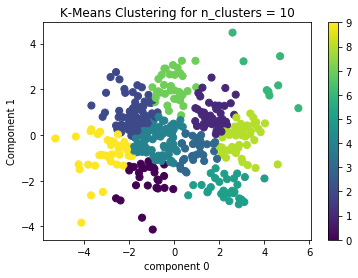

In [155]:
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
index=1
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score (df, preds, metric='euclidean')
    print ("For n_clusters =",n_clusters, " silhouette score is ",score)
    X=[]
    y=preds
    kmeans = pd.DataFrame(y)
    #X.insert((X.shape[++index]),'kmeans',kmeans)
#Plot the clusters obtained using k means
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(df[0],df[1],
                     c=kmeans[0],s=50)
    title="K-Means Clustering for n_clusters = "+str(n_clusters)
    ax.set_title(title)
    ax.set_xlabel('component 0')
    ax.set_ylabel('Component 1')
    plt.colorbar(scatter)

2)Agglomerative Clustering with average linkage

For n_clusters = 2  silhouette score is  0.46855353000861055
For n_clusters = 3  silhouette score is  0.40865486409198665
For n_clusters = 4  silhouette score is  0.38116584006607807
For n_clusters = 5  silhouette score is  0.3472332434141711
For n_clusters = 6  silhouette score is  0.3212401017414889
For n_clusters = 7  silhouette score is  0.31361243233537955
For n_clusters = 8  silhouette score is  0.3146843275724738
For n_clusters = 9  silhouette score is  0.3034725307525542
For n_clusters = 10  silhouette score is  0.2972706751537


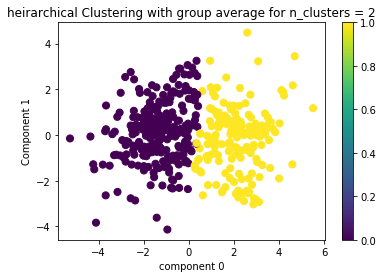

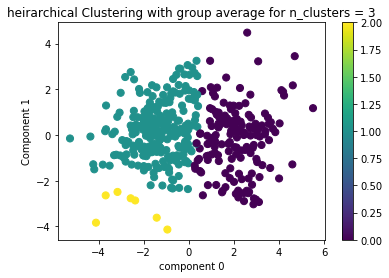

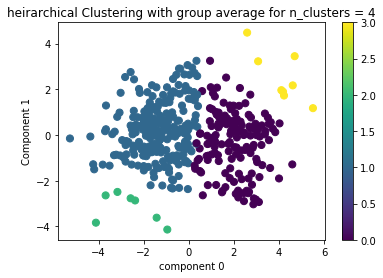

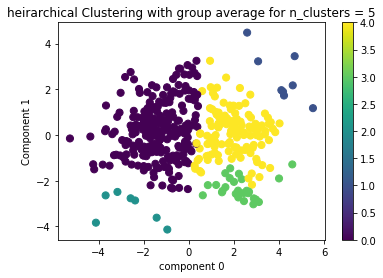

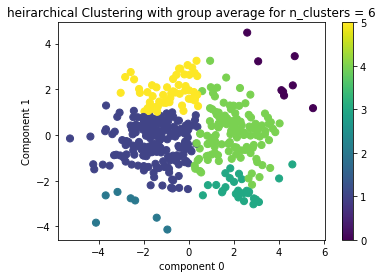

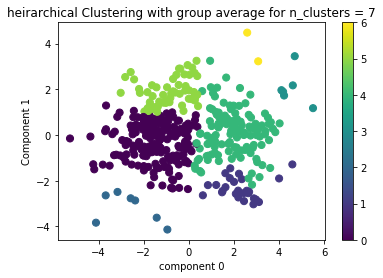

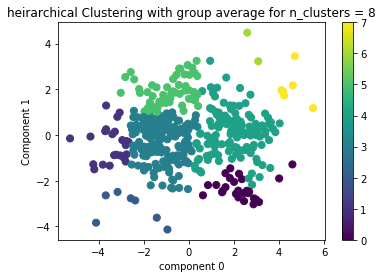

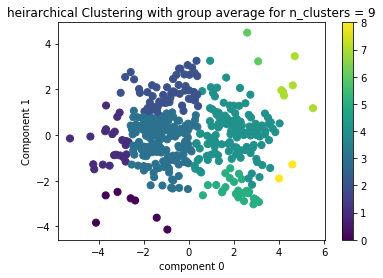

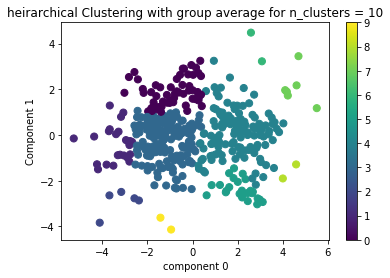

In [157]:
from sklearn.cluster import AgglomerativeClustering
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
index=1
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering (n_clusters=n_clusters,affinity='euclidean', linkage = 'average')
    preds = clusterer.fit_predict(df)

    score = silhouette_score (df, preds, metric='euclidean')
    print ("For n_clusters =",n_clusters, " silhouette score is ",score)
    X=[]
    y=preds
    groupavg = pd.DataFrame(y)
    #X.insert((X.shape[++index]),'kmeans',kmeans)
#Plot the clusters obtained using k means
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(df[0],df[1],
                     c=groupavg[0],s=50)
    title="heirarchical Clustering with group average for n_clusters = "+str(n_clusters)
    ax.set_title(title)
    ax.set_xlabel('component 0')
    ax.set_ylabel('Component 1')
    plt.colorbar(scatter)

3)Agglomerative Clustering with complete linkage

For n_clusters = 2  silhouette score is  0.37467965451528235
For n_clusters = 3  silhouette score is  0.3532101432933322
For n_clusters = 4  silhouette score is  0.30536285394348317
For n_clusters = 5  silhouette score is  0.29153738083629555
For n_clusters = 6  silhouette score is  0.29933143572039184
For n_clusters = 7  silhouette score is  0.3287946250371694
For n_clusters = 8  silhouette score is  0.3218788061405678
For n_clusters = 9  silhouette score is  0.31514233081951637
For n_clusters = 10  silhouette score is  0.3046834639506787


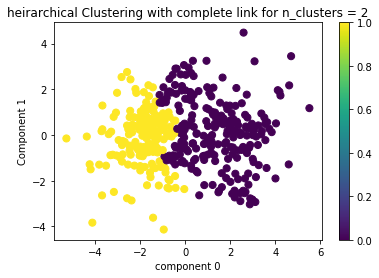

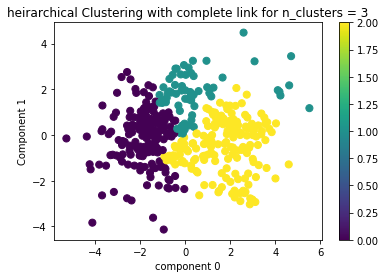

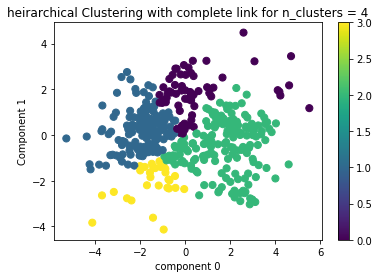

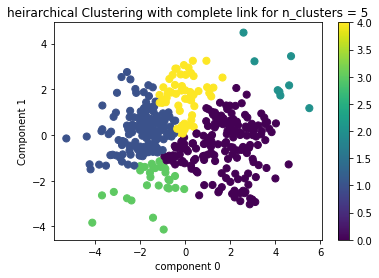

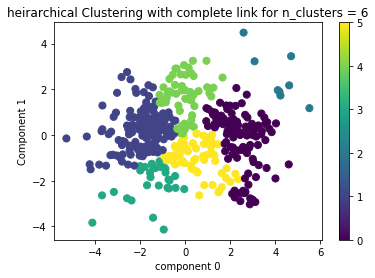

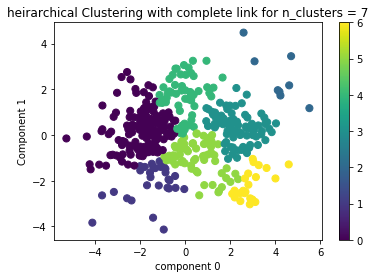

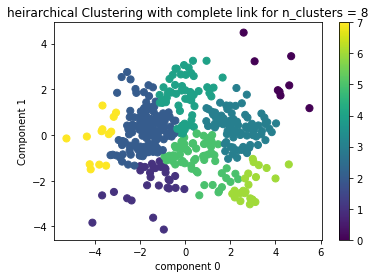

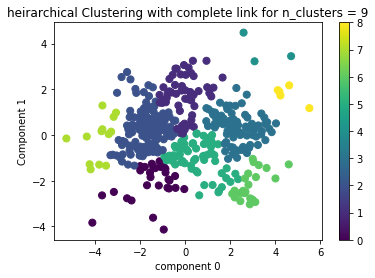

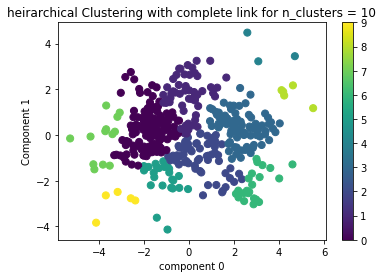

In [159]:
from sklearn.cluster import AgglomerativeClustering
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
index=1
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering (n_clusters=n_clusters,affinity='euclidean', linkage = 'complete')
    preds = clusterer.fit_predict(df)

    score = silhouette_score (df, preds, metric='euclidean')
    print ("For n_clusters =",n_clusters, " silhouette score is ",score)
    X=[]
    y=preds
    groupavg = pd.DataFrame(y)
    #X.insert((X.shape[++index]),'kmeans',kmeans)
#Plot the clusters obtained using k means
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(df[0],df[1],
                     c=groupavg[0],s=50)
    title="heirarchical Clustering with complete link for n_clusters = "+str(n_clusters)
    ax.set_title(title)
    ax.set_xlabel('component 0')
    ax.set_ylabel('Component 1')
    plt.colorbar(scatter)